<a href="https://colab.research.google.com/github/baptrt/MKTRO2024/blob/master/Entra%C3%AEnement_neurones_TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modèle de conservation des pommes de terre en fonction des contraintes environnementales

Ce TP est une application de l'exemple du cours. Nous allons voir comment entrainer un réseau de neurones avec une seule couche et un neurone.

L'objectif est de réaliser une classification binaire. La base de données contient des mesures de germination de pomme de terre sous 7 jours en fonction de la température et de l'humidité.

NB : Un réseau de neurones n'est pas adapté car ce problème est bien trop simple, mais il montre comment implémenter un réseau avec la bibliothèque Keras

In [ ]:
#%pip install scikit-learn==1.0.2
#%pip install tensorflow==2.8.2
#%pip install matplotlib==3.2.2
#%pip install keras==2.8.0

In [ ]:
#import des dépendances
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras import backend as K



## Import de la base de données



In [ ]:
# La base de données est simulé avec des règles arbitraires et du bruit de mesure.
n_mesures = 400
ho2_threshold = 0.80
temp_thershold = 0.75
np.random.seed(1)
mesures = np.random.random((n_mesures,2))
germe = np.array([1 if (mesures[i,0]>ho2_threshold or mesures[i,1]>temp_thershold or (mesures[i,0]+mesures[i,1])>1.15 or np.random.random(1)>0.95) and np.random.random(1)>0.02 else 0 for i in range(n_mesures)])

## Visualisation de la base de données

In [ ]:
plt.figure()
plt.plot(mesures[np.squeeze(np.where(germe==0)),0], mesures[np.squeeze(np.where(germe==0)),1], 'o', c='green', label = 'non germée')
plt.plot(mesures[np.squeeze(np.where(germe==1)),0], mesures[np.squeeze(np.where(germe==1)),1], 'o', c='red', label = 'germée')
plt.xlabel('Taux d\'humidité')
plt.ylabel('Température normalisée')
plt.legend()
plt.title('Mesure de l\'état de conservation des pommes de terre en fonction des contraintes environnementales')
plt.show()

NameError: name 'plt' is not defined

## Création d'un ensemble d'apprentissage et de test

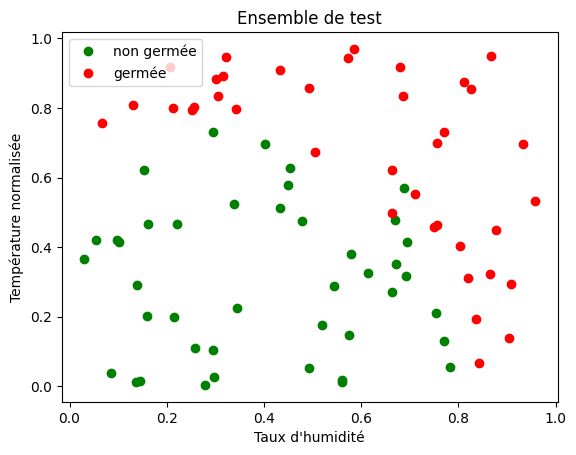

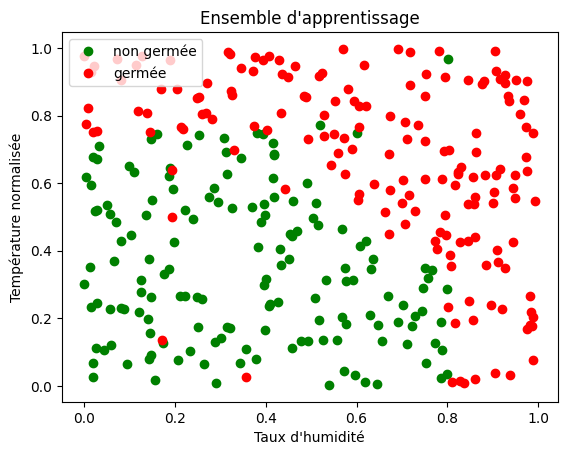

In [ ]:
test_size = 0.2 # on sort 20% du jeu de données pour les test

test_idx = np.random.choice(range(len(mesures)), size=int(len(mesures)*test_size), replace=False) # 20% sont choisis dans la base de données pour faire la base de test
train_idx = np.delete(range(len(mesures)),test_idx) # Les mêmes 20% sont supprimés de la base de données obtenir la base d'apprentissage
mesures_test = mesures[test_idx]
germe_test = germe[test_idx]
mesures_train = mesures[train_idx]
germe_train = germe[train_idx]

#Affichage de la base de test
plt.figure()
plt.plot(mesures_test[np.squeeze(np.where(germe_test==0)),0], mesures_test[np.squeeze(np.where(germe_test==0)),1], 'o', c='green', label = 'non germée')
plt.plot(mesures_test[np.squeeze(np.where(germe_test==1)),0], mesures_test[np.squeeze(np.where(germe_test==1)),1], 'o', c='red', label = 'germée')
plt.xlabel('Taux d\'humidité')
plt.ylabel('Température normalisée')
plt.legend()
plt.title('Ensemble de test')

#Affichage de la base d'apprentissage'
plt.figure()
plt.plot(mesures_train[np.squeeze(np.where(germe_train==0)),0], mesures_train[np.squeeze(np.where(germe_train==0)),1], 'o', c='green', label = 'non germée')
plt.plot(mesures_train[np.squeeze(np.where(germe_train==1)),0], mesures_train[np.squeeze(np.where(germe_train==1)),1], 'o', c='red', label = 'germée')
plt.xlabel('Taux d\'humidité')
plt.ylabel('Température normalisée')
plt.legend()
plt.title('Ensemble d\'apprentissage')
plt.show()

##Création d'un réseau de neurones

In [ ]:
model = keras.Sequential() #Création d'un réseau de neurone vide
model.add(layers.Dense(1, activation="sigmoid", input_shape=(2,), name = "couche_dense")) #Ajout d'une couche dense (tous les neurones d'une couche n-1 sont connectés à la couche n).
#Cette couche n'a qu'un neurone. La fonction d'activation est une sigmoide. Il y a 2 neurones dans la couche d'entrée car il y a 2 valeurs : température et humidité)

model.build() #construction du modèle avec toute les couches (ici, seulement une)

opt = keras.optimizers.Adam(learning_rate=0.1) #choix de l'optimiseur et du learning rate. Adam est très souvent un très bon choix (mieux qu'une simple descente de gradient)

#Compilation avec l'optimiseur, la fonction de cout et la métrique désirée.
model.compile(optimizer=opt,
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])



In [ ]:
model.summary() #Affichage de la structure. On retrouve bien les 3 paramètres à optimiser

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 couche_dense (Dense)        (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##Apprentissage

In [ ]:
epochs=10 #nombre de fois où le réseau voit la totalité de la base de test
history = model.fit(x = mesures_train, y = germe_train, #x et y sont les données d'entrée et de sortie de la base d'apprentissage
  validation_split=0.2, #On selectionne 20% de la base d'apprentissage pour la validation
  epochs=epochs
)

Epoch 1/10
8/8 [==============================] - 1s 32ms/step - loss: 0.6843 - accuracy: 0.4922 - val_loss: 0.6497 - val_accuracy: 0.5469
Epoch 2/10
8/8 [==============================] - 0s 6ms/step - loss: 0.6267 - accuracy: 0.6211 - val_loss: 0.6033 - val_accuracy: 0.6250
Epoch 3/10
8/8 [==============================] - 0s 6ms/step - loss: 0.5764 - accuracy: 0.7227 - val_loss: 0.5760 - val_accuracy: 0.7969
Epoch 4/10
8/8 [==============================] - 0s 6ms/step - loss: 0.5327 - accuracy: 0.7812 - val_loss: 0.5371 - val_accuracy: 0.7969
Epoch 5/10
8/8 [==============================] - 0s 8ms/step - loss: 0.5019 - accuracy: 0.7969 - val_loss: 0.5067 - val_accuracy: 0.7812
Epoch 6/10
8/8 [==============================] - 0s 6ms/step - loss: 0.4741 - accuracy: 0.8203 - val_loss: 0.4829 - val_accuracy: 0.7656
Epoch 7/10
8/8 [==============================] - 0s 6ms/step - loss: 0.4527 - accuracy: 0.8242 - val_loss: 0.4653 - val_accuracy: 0.8438
Epoch 8/10
8/8 [=================

##Affichage des paramètres et prediction de la base de test

In [ ]:
germe_predicted = model.predict(mesures_test) # Prédiction avec le modèle entrainé. On lui donne une (ou un ensemble) d'entrée, et il sort une (ou un ensemble) de sortie
germe_predicted = np.squeeze(germe_predicted) # Problème de dimension du au batch size

ww, bias = model.get_layer('couche_dense').trainable_weights
#ww et bias sont des tenseurs de tensorflow. Il faut les convertir en numpy array pour les lire
ww = np.array(ww)
bias = np.array(bias)
print(f'les parametres sont w0 = {ww[0]},  w1 = {ww[1]} et b = {bias}')

3/3 [==============================] - 0s 3ms/step
les parametres sont w0 = [2.957934],  w1 = [3.3493223] et b = [-3.032555]


##Transformation de la sortie du réseau en valeur binaire

In [ ]:
print(germe_predicted[0]) # La sortie est une valeur entre 0 et 1 car la dernière fonction d'activation est une sigmoide

#On veut une sortie binaire, donc on applique un echelon de heaviside
germe_predicted = [0 if germe_predicted[i] < 0.5 else 1 for i in range(len(germe_predicted))]
print(germe_predicted[0])

0.30736458
0


##Affichage des performances sur la base de test

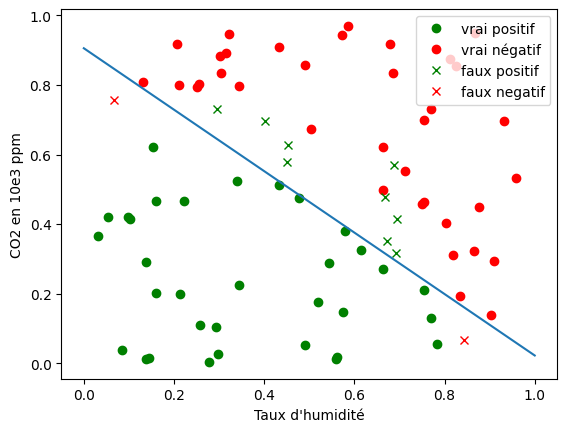

In [ ]:
# Vérification que les prediction de la base de test 'germe_predicted' est identique ou non à 'germe_test' mesure de la base de donnée
# Autrement dit, nous comparons la prediction et la mesure sur une base de test que le réseau n'a pas vu à l'apprentissage
mesures_test_good_prediction = mesures_test[np.squeeze(np.where(germe_test==germe_predicted))]
germe_test_good_prediction = germe_test[np.squeeze(np.where(germe_test==germe_predicted))]
mesures_test_bad_prediction = mesures_test[np.squeeze(np.where(germe_test!=germe_predicted))]
germe_test_bad_prediction = germe_test[np.squeeze(np.where(germe_test!=germe_predicted))]
mesures_test_good_prediction[np.squeeze(np.where(germe_test_good_prediction==0)),0],mesures_test_good_prediction[np.squeeze(np.where(germe_test_good_prediction==0)),1]
bad_prediction = np.squeeze(np.where(germe_test!=germe_predicted))
mesures_test[np.squeeze(np.where(germe_test==germe_predicted)),0]

plt.figure()
plt.plot(mesures_test_good_prediction[np.squeeze(np.where(germe_test_good_prediction==0)),0],mesures_test_good_prediction[np.squeeze(np.where(germe_test_good_prediction==0)),1], 'o', c='green', label = 'vrai positif')
plt.plot(mesures_test_good_prediction[np.squeeze(np.where(germe_test_good_prediction==1)),0],mesures_test_good_prediction[np.squeeze(np.where(germe_test_good_prediction==1)),1], 'o', c='red', label = 'vrai négatif')
plt.plot(mesures_test_bad_prediction[np.squeeze(np.where(germe_test_bad_prediction==0)),0],mesures_test_bad_prediction[np.squeeze(np.where(germe_test_bad_prediction==0)),1], 'x', c='green', label = 'faux positif')
plt.plot(mesures_test_bad_prediction[np.squeeze(np.where(germe_test_bad_prediction==1)),0],mesures_test_bad_prediction[np.squeeze(np.where(germe_test_bad_prediction==1)),1], 'x', c='red', label = 'faux negatif')

#tracé de la courbe limite
a = -ww[0]/ww[1]
b = -bias/ww[1]
X = np.linspace(0,1,10)
Y = a*X+b

plt.plot(X,Y)
plt.xlabel('Taux d\'humidité')
plt.ylabel('CO2 en 10e3 ppm')
plt.legend()
plt.show()